In this notebook, we collect stock price data from yahoo finance, a media property that is part of Yahoo!'s network. <br> 
We utilize the api https://pypi.org/project/yahoo-finance/ by Ran Aroussi. <br>
Credits: Rohan Joseph https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [2]:
# Time period for stock data
from datetime import date
start = datetime.datetime(2016,1,1)
end = date.today()

In [3]:
# Get stock ticker symbols listed on NASDAQ
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
Symbols = companies['Symbol'].tolist()

In [5]:
# create empty dataframe
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAIT,1 : AAL,2 : AAME,3 : AAOI,4 : AAON,5 : AAPL,6 : AAVL,7 : AAWW,8 : AAXJ,9 : ABAC,
1 Failed download:
- ABAC: No data found for this date range, symbol may be delisted
10 : ABAX,11 : ABCB,12 : ABCD,13 : ABCO,14 : ABCW,
1 Failed download:
- ABCW: No data found for this date range, symbol may be delisted
15 : ABDC,
1 Failed download:
- ABDC: No data found, symbol may be delisted
16 : ABGB,
1 Failed download:
- ABGB: No data found for this date range, symbol may be delisted
17 : ABIO,18 : ABMD,19 : ABTL,
1 Failed download:
- ABTL: No data found for this date range, symbol may be delisted
20 : ABY,
1 Failed download:
- ABY: No data found for this date range, symbol may be delisted
21 : ACAD,22 : ACAS,
1 Failed download:
- ACAS: No data found for this date range, symbol may be delisted
23 : ACAT,
1 Failed download:
- ACAT: No data found for this date range, symbol may be delisted
24 : ACET,25 : ACFC,26 : ACFN,27 : ACGL,28 : ACHC,29 : ACHN,
1 Failed download:
- ACHN: No data found, sy

In [6]:
stock_final

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2016-01-04,0.129814,0.129814,0.128314,0.129064,0.129064,2366619.0,AAIT
2016-01-05,0.128314,0.129064,0.127563,0.128314,0.128314,721332.0,AAIT
2016-01-06,0.127563,0.127563,0.126813,0.127563,0.127563,424647.0,AAIT
2016-01-07,0.126063,0.126063,0.119309,0.120810,0.120810,8543284.0,AAIT
2016-01-11,0.123061,0.123811,0.120060,0.120810,0.120810,1715576.0,AAIT
...,...,...,...,...,...,...,...
2021-01-28,42.290001,44.910000,41.849998,43.020000,43.020000,560400.0,ZUMZ
2021-01-29,43.580002,44.639999,42.560001,43.080002,43.080002,249200.0,ZUMZ
2021-02-01,43.520000,43.520000,41.750000,42.380001,42.380001,215900.0,ZUMZ


In [10]:
stock_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2.347141e+06,2.347141e+06,2.347141e+06,2.347141e+06,2.347141e+06,2.347141e+06
mean,3.330880e+04,3.585093e+04,3.102389e+04,3.277237e+04,3.277131e+04,9.284080e+05
std,3.010355e+06,3.265310e+06,2.782064e+06,2.947824e+06,2.947824e+06,5.787728e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-05,1.000000e-05,0.000000e+00
25%,7.800000e+00,7.970000e+00,7.610000e+00,7.800000e+00,7.500000e+00,1.770000e+04
50%,2.075000e+01,2.108000e+01,2.040000e+01,2.075000e+01,1.979037e+01,1.133250e+05
75%,4.440000e+01,4.500000e+01,4.377000e+01,4.441000e+01,4.273285e+01,4.773000e+05
max,6.930000e+08,7.560000e+08,5.544000e+08,5.949000e+08,5.949000e+08,9.911062e+08


In [7]:
#check missing data
stock_final.isna().sum()

Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
Name         0
dtype: int64

In [11]:
# number of companies with stock data
stock_final['Name'].nunique()

1940

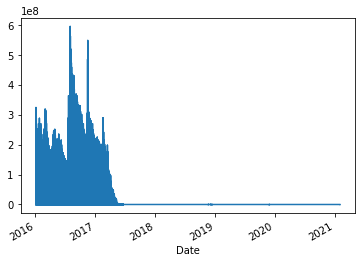

In [32]:
stock_final['Close'].plot()
plt.show()

In [29]:
xyz1 = list(xyz)

In [24]:
# get Alphabet stock from all the companies' data
Alphabet_stock = stock_final[stock_final['Name'] == 'GOOGL']
Alphabet_stock

<AxesSubplot:xlabel='Date'>

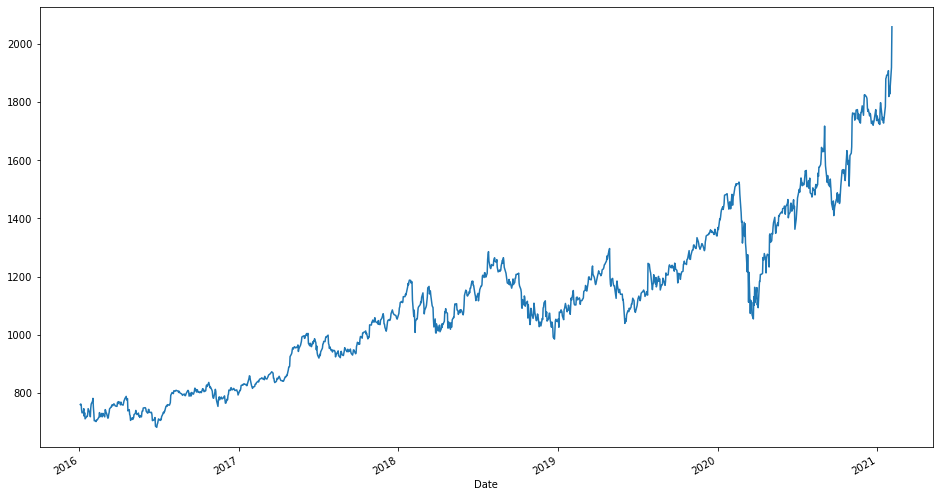

In [34]:
#Plot alphanbet stock since 2016
import matplotlib.pyplot as plt
import seaborn
Alphabet_stock['Adj Close'].plot(figsize=(16, 9))

Define a certain window: month, year etc <br>
More like a fourier window: one year, one month? different window sizes. <br>
Inside the window, derive several descriptors to use ML for predicition <br>
Feature engineering <br>
Given maximum price, min price (two descriptors), derive the ratio, average price, standard deviation of the price, <br>
all time high price, time past since price peaked <br>
Skewness of the price. <br>
Plot histogram of the price, say with 10 bins of the fourier transform of the prices. <br>
Check how important the entropy is<br>
Linear regression coefficient of the price and the date <br>
Pearson coeeficient between price and date <br>
Take care of delisted companies on the url list of NASDAQ companies